### AIM:
> * To design a DNN with minimum accuracy of 99.2 %

In [0]:
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.datasets import mnist
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator

%matplotlib inline

* Loading the data-set

In [0]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

* Reshaping and Normalization

In [23]:
No_of_pixels=x_train.shape[1]*x_train.shape[2]

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')
x_test  = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32')

x_train/=255
x_test/=255

print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


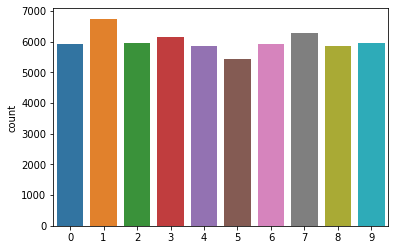

In [24]:
g=sns.countplot(y_train)

*  Splitting the dataset into training, testing and validation datasets

In [0]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.1)

* Data Augmentation

In [0]:
data_generator=ImageDataGenerator(rotation_range=10,zoom_range=0.1,width_shift_range=0.1,height_shift_range=0.1)
data_generator.fit(x_train)

* The Hyper-Parameters

In [0]:
No_epochs=18
input_shape=(28,28,1)
learning_rate=0.5
dropout_rate=0.5
batch_size=128

* The Structure of the Deep Neural Network/ The Architecture of the DNN

In [51]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3),activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3,3),activation='relu'))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(64, activation='relu'))
model.add(Dropout(dropout_rate))
model.add(Dense(10,activation='softmax'))
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_10 (Flatten)         (None, 576)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 64)              

* Training the DNN

In [52]:
history = model.fit_generator(data_generator.flow(x_train,y_train, batch_size=batch_size),epochs =No_epochs, validation_data = (x_val,y_val))

Epoch 1/18
422/422 [==============================] - 13s 32ms/step - loss: 0.6822 - acc: 0.7787 - val_loss: 0.0912 - val_acc: 0.9713
Epoch 2/18
422/422 [==============================] - 13s 30ms/step - loss: 0.2356 - acc: 0.9308 - val_loss: 0.0695 - val_acc: 0.9780
Epoch 3/18
422/422 [==============================] - 13s 30ms/step - loss: 0.1643 - acc: 0.9525 - val_loss: 0.0613 - val_acc: 0.9845
Epoch 4/18
422/422 [==============================] - 13s 30ms/step - loss: 0.1413 - acc: 0.9597 - val_loss: 0.0430 - val_acc: 0.9873
Epoch 5/18
422/422 [==============================] - 13s 30ms/step - loss: 0.1222 - acc: 0.9657 - val_loss: 0.0393 - val_acc: 0.9882
Epoch 6/18
422/422 [==============================] - 13s 30ms/step - loss: 0.1058 - acc: 0.9703 - val_loss: 0.0352 - val_acc: 0.9897
Epoch 7/18
422/422 [==============================] - 13s 30ms/step - loss: 0.0968 - acc: 0.9726 - val_loss: 0.0353 - val_acc: 0.9907
Epoch 8/18
422/422 [==============================] - 13s 30ms

* Plotting the loss v/s epochs graph

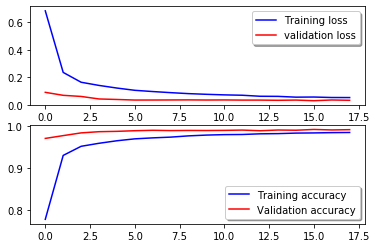

In [53]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

* Evaluating the accuracy

In [54]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 58us/step


[0.02101381729814857, 0.9932]

* Random Testing 

1


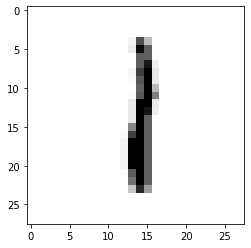

In [47]:
random_index=4010
plt.imshow(x_test[random_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[random_index].reshape(1, 28, 28, 1))
print(pred.argmax())